In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data_files/full_telegram_data.csv')
df.sample(10)

,Unnamed: 0,channel_id,date,content,lang
291921,290077,-1001223955273,2025-03-15 08:00:00,⚠ Увага!\n🛫 Активність ворожої тактичної авіац...,uk
86765,87738,-1001296487842,2023-04-10 13:00:00,Відбій тривоги в Сумській області!\n\nhttps://...,uk
90327,85102,-1001802360559,2023-04-28 19:00:00,"🚀Балістична загроза для Донеччини, під можливи...",uk
273515,277198,-1001937068950,2025-01-12 06:00:00,🪂 Сводка ▫️▫️▫️.\n\n🪂 Десантники 106-ой Тульск...,ru
65469,63645,-1001802360559,2023-01-11 17:00:00,"💥ППО знищила безпілотник, який опівдні спрямув...",uk
82921,82813,-1001206076820,2023-03-22 11:00:00,❎ ВІДБІЙ\n\nнадіслати новину @hueviy_kherson_B...,uk
122235,121407,-1001206076820,2023-08-24 16:00:00,❎ ВІДБІЙ\n\nнадіслати новину @hueviy_kherson_B...,uk
225196,222019,-1001802360559,2024-08-14 15:00:00,🔴Загроза застосування авіаційного озброєння з ...,uk
280765,281845,-1001223955273,2025-02-05 01:00:00,"⚠ Увага!\n🛵 ""Шахеди""на Кіровоградщині➡️ курсо...",uk
187727,182449,-1001296487842,2024-03-31 13:00:00,Підкуплені євродепутати та дезінформація: в ЄС...,uk


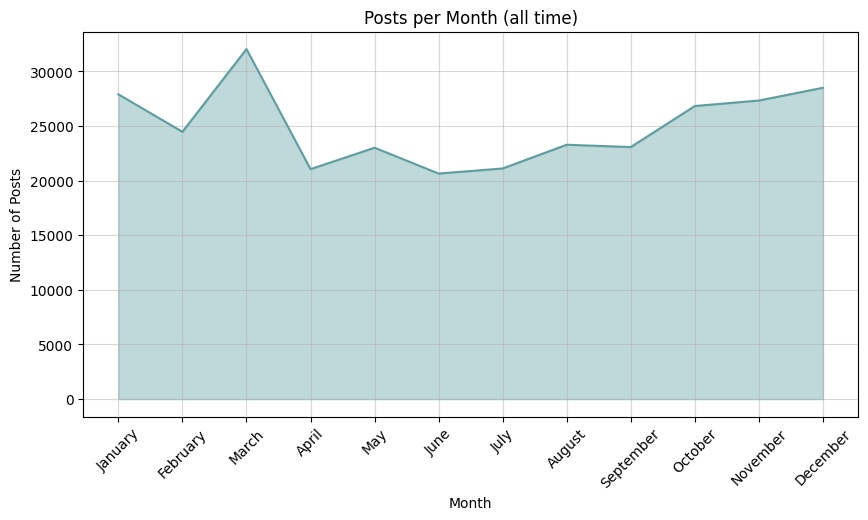

In [41]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

month_counts = df['month'].value_counts().sort_index()

month_names = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
]
norm = plt.Normalize(month_counts.min(), month_counts.max())
colors = plt.cm.summer(norm(month_counts))
plt.figure(figsize=(10, 5))
plt.plot(month_names, month_counts, color='cadetblue')
plt.fill_between(month_names, month_counts, color='cadetblue', alpha=0.4)
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Posts per Month (all time)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.5)
plt.show()

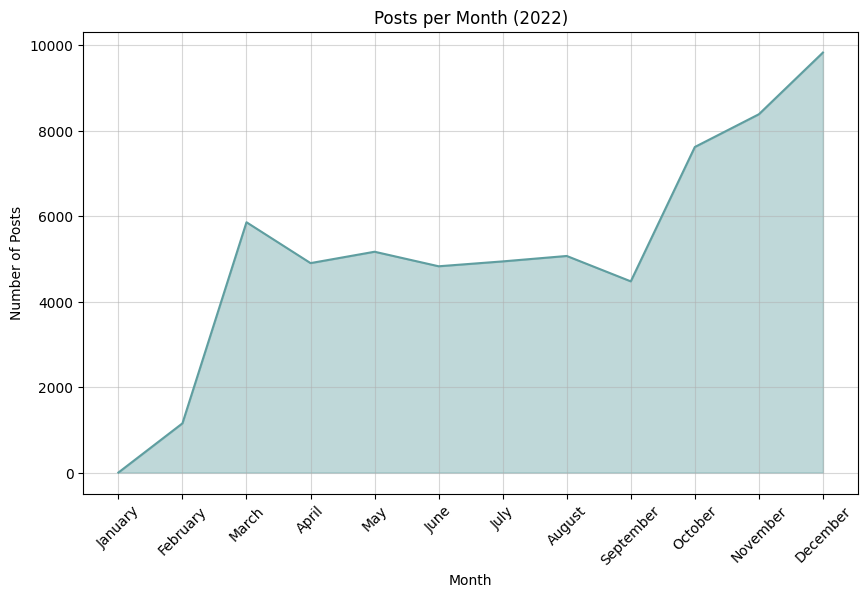

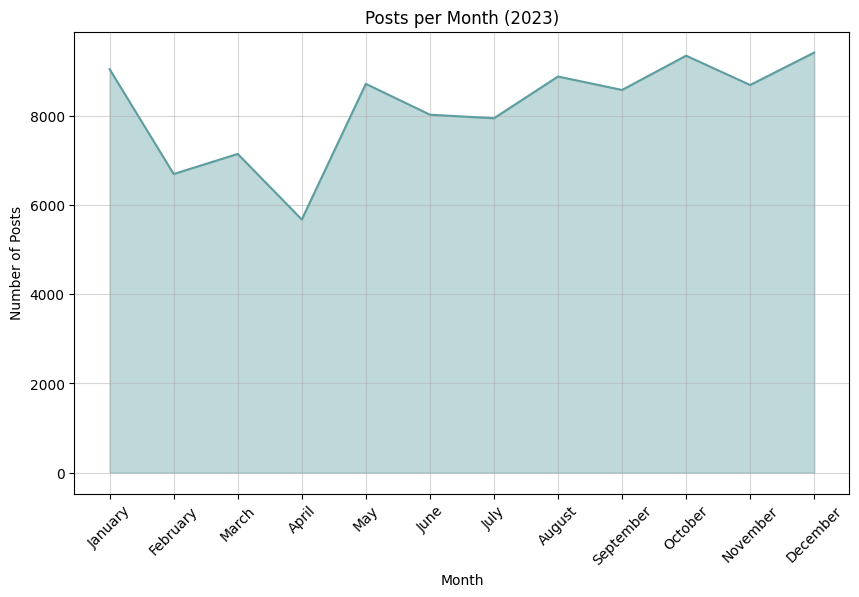

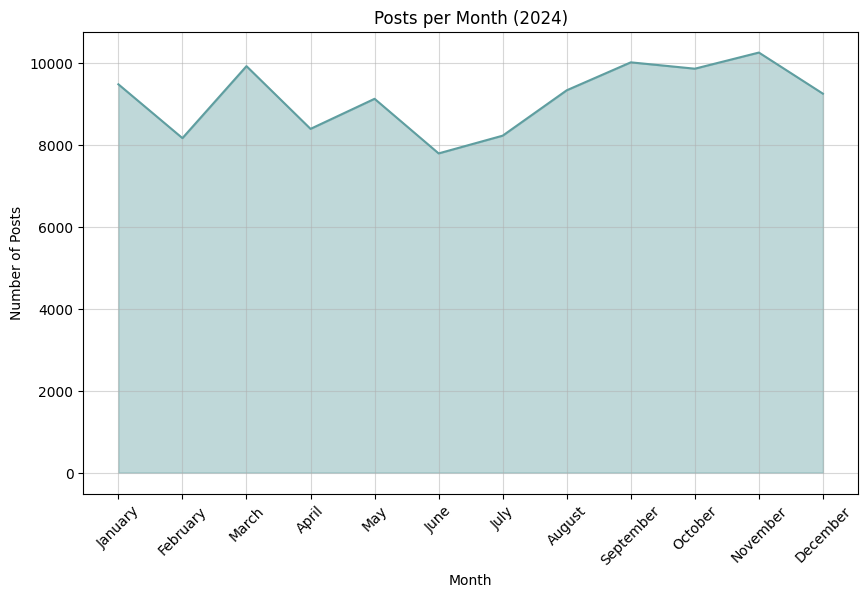

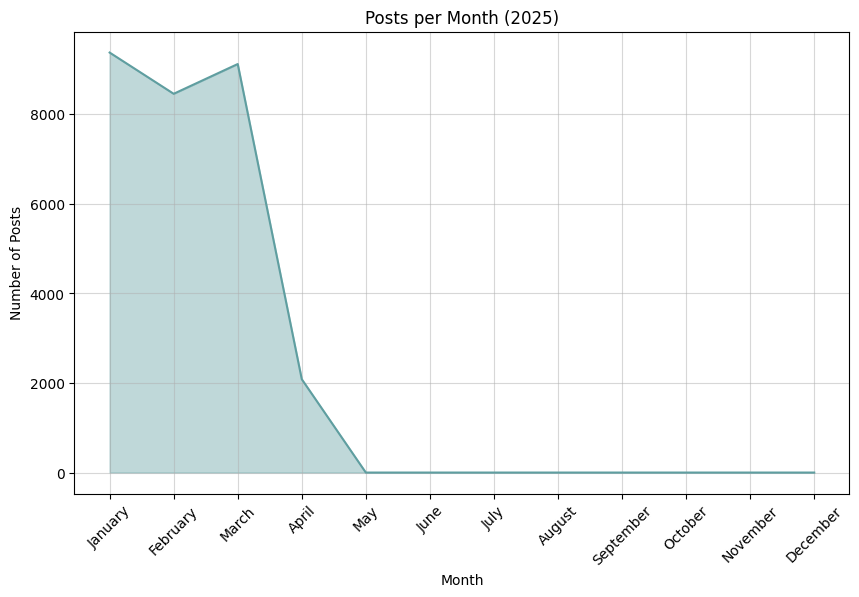

In [40]:
years = [2022, 2023, 2024, 2025]
for year in years:
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    
    df_ = df[df['date'].dt.year == year]
    
    month_counts = df_['month'].value_counts().sort_index()
    month_counts_full = month_counts.reindex(range(1, 13), fill_value=0)
    month_names = [
        'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'
    ]
    norm = plt.Normalize(month_counts_full.min(), month_counts_full.max())
    colors = plt.cm.summer(norm(month_counts_full))
    plt.figure(figsize=(10, 6))
    plt.plot(month_names, month_counts_full, color='cadetblue')
    plt.fill_between(month_names, month_counts_full, color='cadetblue', alpha=0.4)
    plt.xlabel('Month')
    plt.ylabel('Number of Posts')
    plt.title(f'Posts per Month ({year})')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.5)
    plt.show()

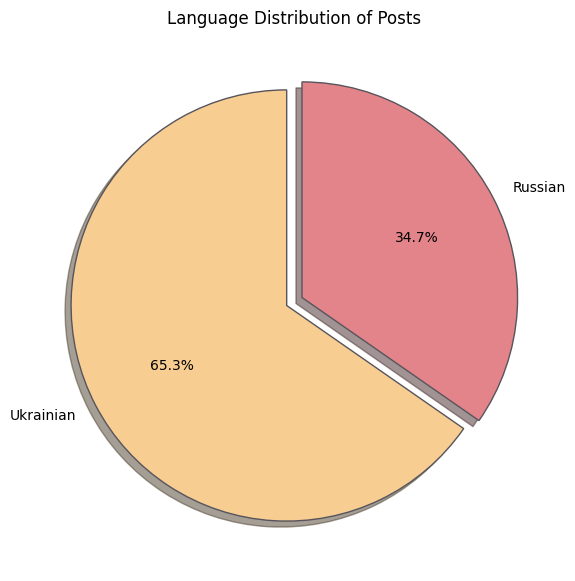

In [23]:
lang_counts = df['lang'].value_counts()

lang_labels = {
    'uk': 'Ukrainian',
    'ru': 'Russian'
}
custom_labels = lang_counts.index.map(lang_labels)

plt.figure(figsize=(7, 7))
plt.pie(lang_counts,
        labels=custom_labels,
        explode=[0.04]*len(lang_counts),
        autopct='%1.1f%%',
        startangle=90,
        colors=['#f7cd92', '#e3848a'],
        shadow=True,
        wedgeprops={'edgecolor': '#57545c', 'linewidth': 1, 'linestyle': 'solid'})
plt.title('Language Distribution of Posts')
plt.show()